### 한국인의 삶을 파악하라(1) - 나이와 월급의 관계
* 몇살때 월급을 가장 많이 받을까?
* 대상 변수 : 나이(birth), 월급(income)

* 2006~2015년까지 전국에서 7000여 가구를 선정하여 매년 추적 조사한 자료
* 데이터 셋 : Koweps_hpc10_2015_beta1.sav 
  * 2016년도 발간한 복지패널 데이터 6,914가구, 16,664명에 대한 정보

In [8]:
# install.packages("foreign")

In [9]:
library(foreign)
library(dplyr)
library(ggplot2)
library(readxl)

In [10]:
dat_welfare <- read.spss(file="D:\\dataset\\R_Doit\\Koweps_hpc10_2015_beta1.sav", to.data.frame=T)
welfare <- dat_welfare

Warning message in read.spss(file = "D:\\dataset\\R_Doit\\Koweps_hpc10_2015_beta1.sav", :
"D:\dataset\R_Doit\Koweps_hpc10_2015_beta1.sav: Compression bias (0) is not the usual value of 100"

In [11]:
welfare <- rename(welfare, 
                 sex=h10_g3,
                 birth=h10_g4,
                 marriage=h10_g10,
                 religion=h10_g11,
                 income=p1002_8aq1,
                 code_job=h10_eco9,
                 code_region=h10_reg7)
names(welfare)

[1] "h10_id"           "h10_ind"          "h10_sn"          
  [4] "h10_merkey"       "h_new"            "h10_cobf"        
  [7] "h10_reg5"         "code_region"      "h10_din"         
 [10] "h10_cin"          "h10_flag"         "p10_wgl"         
 [13] "p10_wsl"          "p10_wgc"          "p10_wsc"         
 [16] "h10_hc"           "nh1001_1"         "nh1001_2"        
 [19] "h1001_1"          "h10_pind"         "h10_pid"         
 [22] "h10_g1"           "h10_g2"           "sex"             
 [25] "birth"            "h10_g6"           "h10_g7"          
 [28] "h10_g8"           "h10_g9"           "marriage"        
 [31] "religion"         "h10_g12"          "h1001_110"       
 [34] "h1001_5aq1"       "h1001_5aq2"       "h1001_5aq3"      
 [37] "h1001_5aq4"       "h10_med1"         "h10_med2"        
 [40] "h10_med3"         "h10_med4"         "h10_med5"        
 [43] "h10_med6"         "h10_med7"         "h10_med8"        
 [46] "h10_g9_1"         "h10_med9"         "h10_med10"       
 [49] "h10_eco1"         "h10_eco2"         "h10_eco3"        
 [52] "h10_eco4"         "h10_eco4_1"       "h10_eco5_1"      
 [55] "h10_eco6"         "h10_eco_7_1"      "h10_eco_7_2"     
 [58] "h10_eco_7_3"      "h10_eco8"         "code_job"        
 [61] "h10_eco10"        "h10_eco11"        "h10_soc1"        
 [64] "h10_soc_2"        "h10_soc_3"        "h10_soc_4"       
 [67] "h10_soc_5"        "h10_soc_6"        "h10_soc_7"       
 [70] "h10_soc_8"        "h10_soc_9"        "h10_soc_10"      
 [73] "h10_soc_11"       "h10_soc8"         "h10_soc9"        
 [76] "h10_soc11"        "h10_soc10"        "h10_soc_12"      
 [79] "h10_soc_13"       "h1005_1"          "h1005_3aq1"      
 [82] "h1005_2"          "h1005_3"          "h1005_4"         
 [85] "h1005_5"          "h1005_6"          "h1005_7"         
 [88] "nh1005_8"         "nh1005_9"         "h1005_3aq2"      
 [91] "h1006_aq1"        "h1006_1"          "h1006_2"         
 [94] "h1006_4"          "h1006_5"          "h1006_3"         
 [97] "h1006_6"          "h1006_8"          "h1006_9"         
[100] "h1006_aq2"        "h1006_aq3"        "h1006_10"        
[103] "h1006_11"         "h1006_12"         "h1006_13"        
[106] "h1006_14"         "h1006_21"         "h1006_22"        
[109] "h1006_23"         "h1006_24"         "h1006_25"        
[112] "h1006_27"         "h1006_30"         "h1006_33"        
[115] "h1006_36"         "h1006_39"         "h1006_3aq1"      
[118] "h1007_3aq1"       "h1007_3aq2"       "h1007_5aq1"      
[121] "h1007_3aq3"       "h1007_3aq4"       "h1007_3aq5"      
[124] "h1007_6aq1"       "h1007_3aq6"       "h1007_5aq2"      
[127] "h1007_3aq7"       "h1007_3aq8"       "h1007_3aq9"      
[130] "h1007_3aq10"      "h1007_3aq11"      "h1007_5aq3"      
[133] "h1007_5aq4"       "h1007_3aq13"      "h1007_6aq4"      
[136] "h1007_6aq6"       "h1007_3aq14"      "h1007_3aq15"     
[139] "h1007_3aq16"      "h1007_3aq17"      "h1007_4"         
[142] "h1007_6aq7"       "h1007_6aq8"       "h1007_6aq9"      
[145] "h1007_6aq10"      "h1007_6aq11"      "h1007_5"         
[148] "h1007_6aq12"      "h1007_6aq13"      "h1007_6aq14"     
[151] "h1007_9"          "h1009_9"          "h1009_6aq4"      
[154] "h10_inc1"         "h10_inc2_1"       "h10_inc2_2"      
[157] "h10_inc3_1"       "h10_inc3_2"       "h10_inc4_1"      
[160] "h10_inc4_2"       "h10_inc5_1"       "h10_inc5_2"      
[163] "h10_inc6_1"       "h10_inc6_2"       "h10_inc7_1"      
[166] "h10_inc7_2"       "h1008_106"        "h1008_107"       
[169] "h1008_108"        "h1008_109"        "h1008_110"       
[172] "h1008_111"        "h10_inc2_3"       "h10_inc2"        
[175] "h10_inc3_6"       "h10_inc3"         "h10_inc4_7"      
[178] "h10_inc4"         "h10_inc4_8"       "h10_inc4_9"      
[181] "h1008_155"        "h1008_156"        "h1008_157"       
[184] "h1008_158"        "h1008_160"        "h1008_159"       
[187] "h1008_3aq3"       "h1008_161"        "h1008_162"       
[190] "h1008_163"        "h1008_1

In [12]:
welfare <- select(welfare, sex, birth, marriage, religion, income, code_job, code_region)
names(welfare)

[1] "sex"         "birth"       "marriage"    "religion"    "income"     
[6] "code_job"    "code_region"

### 01 변수 확인

In [20]:
class(welfare$birth)
class(welfare$income)

dim(welfare)
head(welfare)

[1] "numeric"

[1] "numeric"

[1] 16664     7

sex,birth,marriage,religion,income,code_job,code_region
2,1936,2,2,NA,NA,1
2,1945,2,2,NA,NA,1
1,1948,2,2,120,942,1
1,1942,3,1,200,762,1
2,1923,2,1,NA,NA,1
1,1962,1,1,NA,530,1


### birth 살펴보기

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1907    1946    1966    1968    1988    2014 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


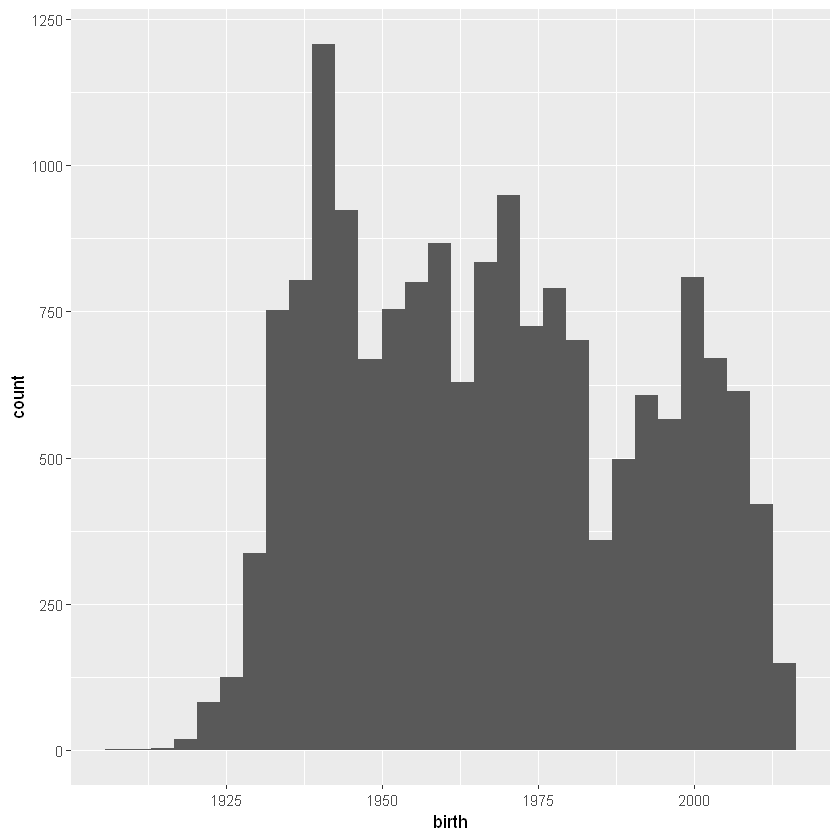

In [24]:
summary(welfare$birth)
ggplot(welfare, aes(x=birth)) + geom_histogram()

### 02 결측치 확인 및 파생변수 생성
* 1900~2014사이의 값을 지니고, 모름/무응답은 9999로 코딩되어 있음.

In [17]:
table(is.na(welfare$birth))


FALSE 
16664 

In [21]:
## 만약 결측치가 있다면 다음과 같이 처리 가능
welfare$birth <- ifelse(welfare$birth==9999, NA, welfare$birth)
table(is.na(welfare$birth))


FALSE 
16664 

### 나이변수(age) 만들기
* 2015년도 조사 진행. 2015에서 연도를 뺀 후, 1년을 더하면 된다.
* age <- 2015 - welfare$birth + 1 

In [22]:
welfare$age <- 2015 - welfare$birth + 1
welfare

sex,birth,marriage,religion,income,code_job,code_region,age
2,1936,2,2,NA,NA,1,80
2,1945,2,2,NA,NA,1,71
1,1948,2,2,120,942,1,68
1,1942,3,1,200,762,1,74
2,1923,2,1,NA,NA,1,93
1,1962,1,1,NA,530,1,54
2,1963,1,1,NA,NA,1,53
2,2003,0,1,NA,NA,1,13
1,1927,1,1,NA,NA,1,89
2,1934,1,1,NA,NA,1,82


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


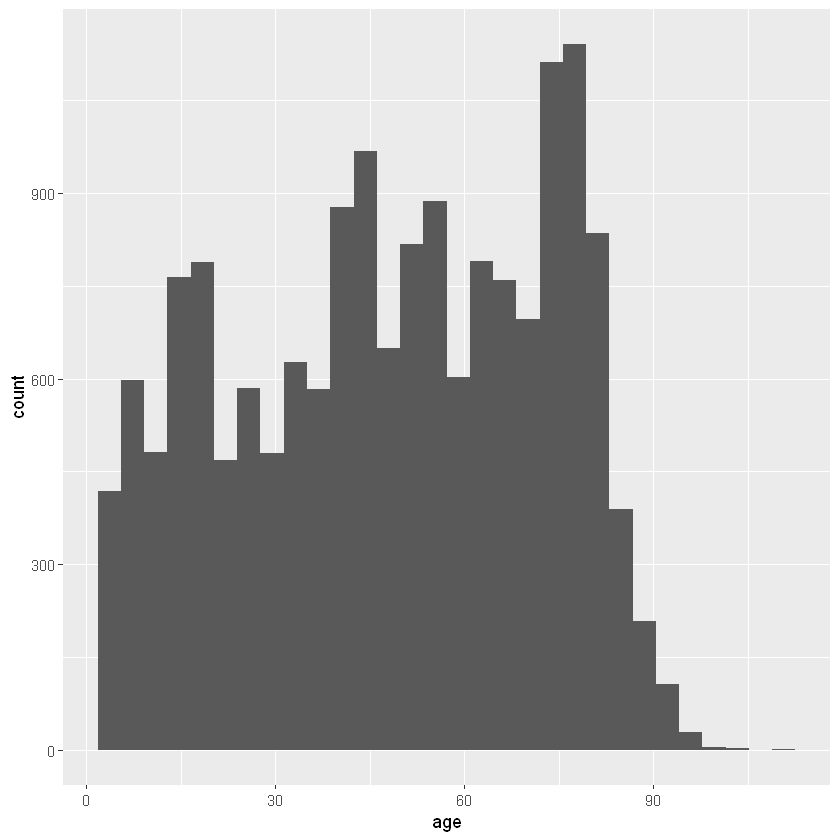

In [23]:
ggplot(welfare, aes(x=age)) + geom_histogram()

### 03 나이(age)와 월급(income)의 관계 분석

### (가) 나이에 따른 월급 평균표만들기 

In [26]:
age_income <- welfare %>% 
              filter(!is.na(income)) %>%
              group_by(age) %>%
              summarise(mean_income = mean(income))
head(age_income)

age,mean_income
20,121.3000
21,105.5185
22,130.0923
23,141.7157
24,134.0877
25,144.6559


(나) ggplot를 이용한 그래프 그리기 
* x축 : age, y축 : 월급평균(mean_income)

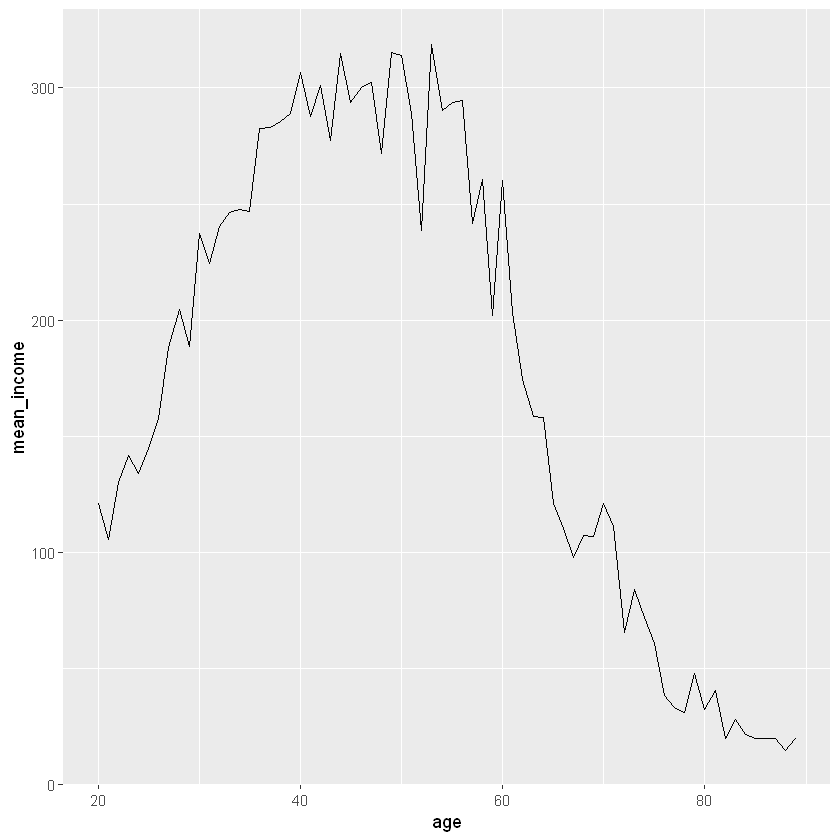

In [27]:
ggplot(age_income, aes(x=age, y=mean_income)) + geom_line()

### 한국인의 삶을 파악하라(2) - 나이와 월급의 관계
* 어떤 연령의 월급이 가장 많이 받을까?
* 대상 변수 : 나이(birth)=> 연령대(class), 월급(mean_income)

In [28]:
welfare <- welfare %>%
           mutate(class=ifelse(age<25, 'young',
                            ifelse(age >= 59, "middle", "old")))
table(welfare$class)


middle    old  young 
  6475   6522   3667 

### 막대 그래프

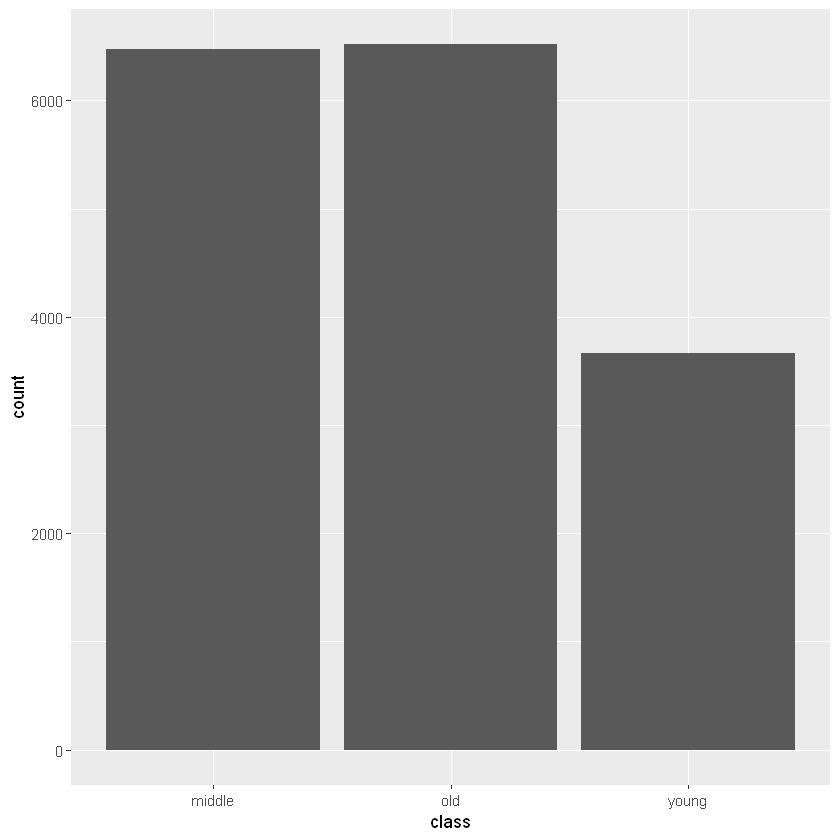

In [32]:
ggplot(welfare, aes(x=class)) + geom_bar()

In [35]:
### 연령대별 월급 평균표 만들기 
class_income <- welfare %>% filter(!is.na(income)) %>%
                          group_by(class) %>%
                          summarise(mean_income = mean(income))
class_income

class,mean_income
middle,131.0803
old,272.2487
young,128.5538


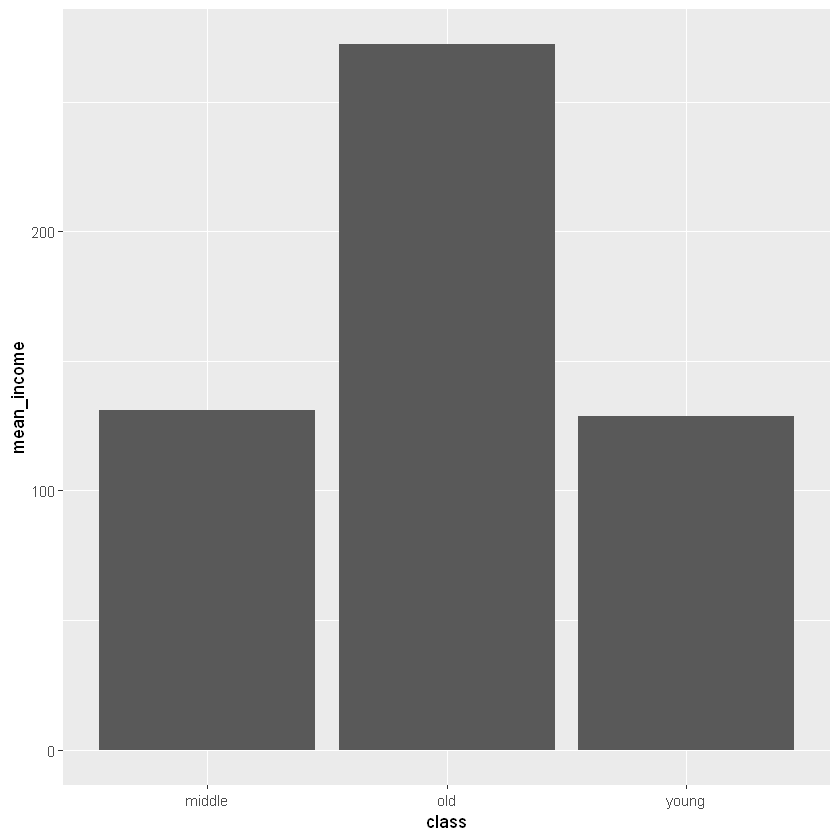

In [39]:
ggplot(class_income, aes(x=class, y=mean_income)) + geom_col()

### x축의 값을 초년, 중년, 노년의 나이 순으로 정렬하도록 설정

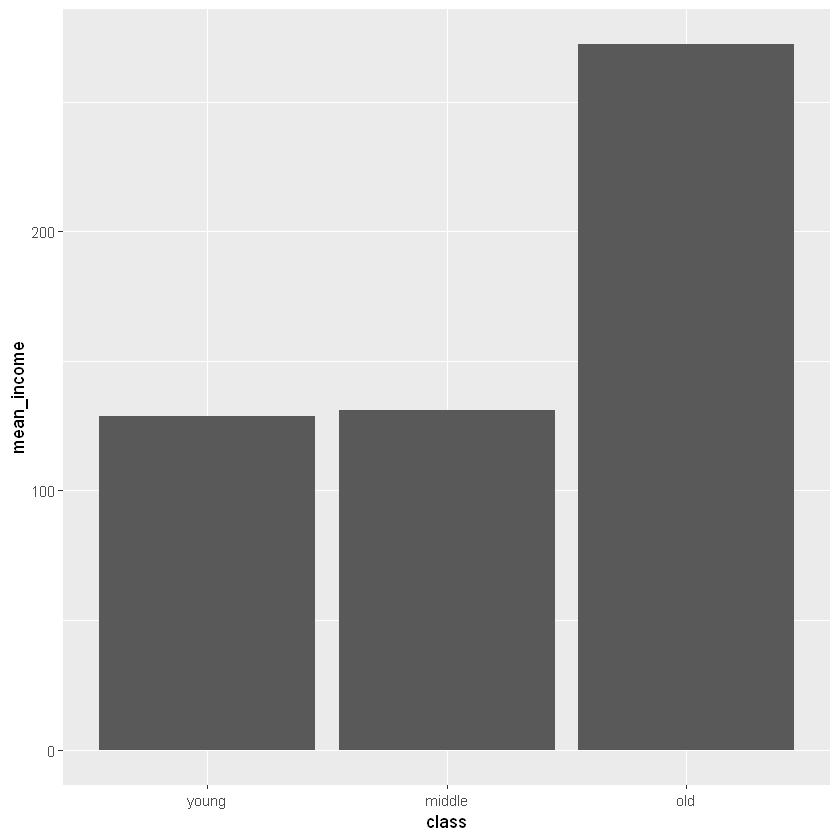

In [41]:
ggplot(class_income, aes(x=class, y=mean_income)) + geom_col() + 
             scale_x_discrete(limits = c('young', 'middle', 'old'))

### 확인
* 중년이 280만원 정도로 가장 높다.
* 노년은(131만) 초년이 받는 것보다 적은 월급(128만원)

### REF
* 쉽게 배우는 R데이터 분석 참조

<font size=2> Copyright 2019 LIM Co.(예영Edu Co.) all rights reserved. </font><br>
<font size=2> 교육용으로 작성된 것으로 배포 및 복제시에 사전 허가가 필요합니다.</font>